# Initial Data Preprocessing using new Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
basedir = '../../../tlm-data/'
data_files = []
with os.scandir(basedir) as dir:
    for item in dir:
        if item.is_file() and item.name[-4:] == '.csv':
            data_files.append(item.name)
            
print(*data_files, sep='\n')

Battery1_telemetryOutputData_2020_02_05_15_48_33.csv
Battery2_telemetryOutputData_2020_02_05_15_48_33.csv
CmdRcv_telemetryOutputData_2020_02_05_15_48_33.csv
RSSI1_telemetryOutputData_2020_02_05_15_48_33.csv
RSSI2_telemetryOutputData_2020_02_05_15_48_33.csv
TlmTx_telemetryOutputData_2020_02_05_15_48_33.csv


In [3]:
def process_file(data_file):
    values, nanos = [], []
    with open(f'{basedir}{data_file}') as data_csv:
        lines = [ x[:-1] for x in  data_csv.readlines() ]
        for line in lines[1:]:
            parts = line.split(',')
            if len(parts) < 4:
                continue
            _, val, time, _ = line.split(',')
            values.append(val)
            nanos.append(time)
            
    return values, nanos

690 690


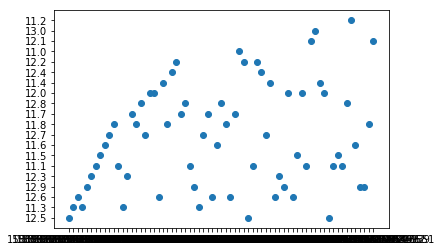

In [7]:
vals, time = process_file(data_files[0])
print(len(vals[0::10]), len(time[0::10]))
plt.scatter(time[0::100], vals[0::100])